**Mathematical Foundations for Computer Vision and Machine Learning**

*** Assignment04 - k-means algorithm (MNIST) ***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment04)

# Setting up

By changing variable numOfClusters, you can see that "k" in **k-means** changes. But in this assignment, **k is 10**.

Variable ```label``` is used to store the label of nth image.

Variable ```im_average``` stores the vector of centroids of each clusters.

Variable ```im_count``` stores the number of images of each cluster.

Variable ```E``` stores the energy of each loop.

Variable ```A``` stores the accuracy of each loop.

Variable ```threshold``` means the termination condition of this algorithm, which can be written as :

$$ \Delta{E} = E_{n-1} - E_{n}$$
$$ E_{n-1} - E_{n} < threshold$$

The **maximum k** is **6** since there's not enough color. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_data = "mnist_test.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

# Conditions
numOfClusters = 10
size_row = 28  # height of the image
size_col = 28  # width of the image
dim = size_col * size_row
num_image = 0
im_average = np.zeros((dim, numOfClusters), dtype=float)           # centroid of each cluster
im_count = np.zeros(10, dtype=int)
E = [] # energy of each iteration
A = [] # accuracy of each iteration
iter_num = 0
threshold = 0.005
a = np.zeros(numOfClusters)


# Normalize

We normalize images since there can be some differences in lightness.

In [2]:
# Functions

def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))

    return (data_normalized)

# Loading Images

Variable ```list_image``` stores the images as vector.

Variable ```list_label``` stores the label of each image.

Variable ```list_assign``` stores the cluster number that image is assigned.

Variable ```listOfDist``` stores the distance (second-order) from one point to all centroids.

In [3]:
def load():
    num_image = len(data)
    count = 0  # count for the number of images
    list_image = np.zeros((size_row * size_col, num_image), dtype=float)  # image data
    list_label = np.zeros(num_image, dtype=int)  # given label of image
    list_assign = np.zeros(num_image, dtype=int)
    listOfDist = np.zeros((numOfClusters, num_image))

    for line in data:
        line_data = line.split(',')
        label = line_data[0]
        im_vector = np.asfarray(line_data[1:])
        im_vector = normalize(im_vector)

        list_label[count] = label
        list_image[:, count] = im_vector

        count += 1

    return list_image, list_label, list_assign, listOfDist, num_image

# Define Essential Functions

I define some funtions that is essential to implement k-means algorithm.

```initializeLabel``` initializes the whole images' label.

```computeDistance``` computes the matrix ```listOfDist```

```assignLabel``` assigns the whole images to the most close centroid.

```computeCentroid``` computes the vector of each centroids using ```list_assign``` and ```list_image```.

```computeEnergy``` computes energy of each step and record it to list ```E```

```computeAccuracy``` computes accuracy of each step and record it to list ```A```

```record``` calls ```computeEnergy``` and ```computeAccuracy```.

In [4]:
def initializeLabel(numOfClusters):
    return np.random.randint(numOfClusters, size = num_image)

def computeDistance():
    # L2 Norm
    for c in range(numOfClusters):
        for i in range(num_image):
            listOfDist[c][i] = sum((im_average[:,c] - list_image[:,i])**2)

def assignLabel():
    for i in range(num_image):
        list_assign[i] = np.argmin(listOfDist[:,i])

def computeCentroid():
    num = np.zeros((numOfClusters))
    c = np.zeros((dim, numOfClusters))

    for i in range(num_image):
        num[list_assign[i]] += 1
        c[:,list_assign[i]] += list_image[:,i]

    for i in range(numOfClusters):
        c[:,i] /= num[i]
    return c

def computeEnergy(): #must decrease
    energy = 0
    for i in range(num_image):
        energy += sum((im_average[:,list_assign[i]] - list_image[:,i])**2)
    energy /= num_image
    return energy

def computeAccuracy():
    corrects = 0
    for k in range(numOfClusters):
        im_count = np.zeros(numOfClusters)
        for i in range(num_image):
            if list_assign[i] == k:
                im_count[list_label[i]] += 1

        a[k] = np.argmax(im_count)

    for i in range(num_image):
        if list_label[i] == a[list_assign[i]]:
            corrects += 1
    return corrects/num_image

def record():
    E.append(computeEnergy())
    A.append(computeAccuracy())

# Initial Centroid Images

By using ```list_assign = initializeLabel(numOfClusters=numOfClusters)``` the initial labels are set.
$$ c_i = \frac{1}{N}\Sigma{x_k}   $$ where $$l(x_k) == i$$


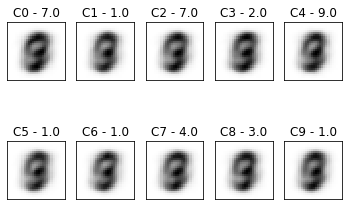

In [5]:
# Test Code
list_image, list_label, list_assign, listOfDist, num_image = load()
list_assign = initializeLabel(numOfClusters=numOfClusters)
im_average = computeCentroid()
record()
iter_num += 1

plt.figure(1)
for i in range(numOfClusters):

    plt.subplot(2, 5, i + 1)
    plt.title("C"+str(i)+" - "+str(a[i]))
    plt.imshow(im_average[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# Final label

After k-means algorithm, the data are clustered into 'k' clusters. Data are labeled in ```list_assign``` and answers are stored in ```list_label```.

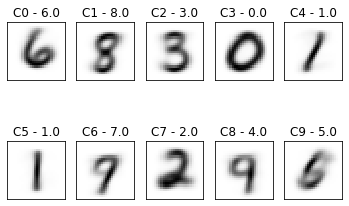

In [6]:
while True:
    computeDistance()
    assignLabel()
    im_average = computeCentroid()
    record()
    #print(E[iter_num])
    #print(A[iter_num])
    if E[-2] - E[-1] < threshold:
        break
    iter_num += 1

plt.figure(2)
for i in range(numOfClusters):
    plt.subplot(2, 5, i + 1)
    plt.title("C"+str(i)+" - "+str(a[i]))
    plt.imshow(im_average[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# Energy per each iteration

$$ E = \frac{1}{N}\Sigma{\|x_i - c_k\|^2} $$

Let's see if energy decreased monotonically. It seems my program works fine.

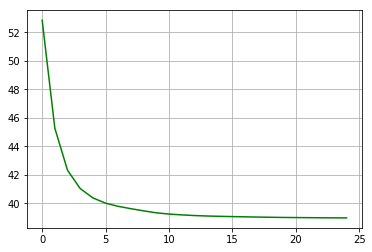

In [7]:
plt.figure(3)
x_range = np.arange(iter_num+1)
plt.plot(x_range,E,"g")
plt.grid(True)
plt.show()

# Accuracy per each iteration

$$ A = \frac{1}{N}\Sigma count{(x_i,c_k)} $$

We first find what each cluster means. This is defined by argmax function.

Next, we count correct images and divide it into number of images.

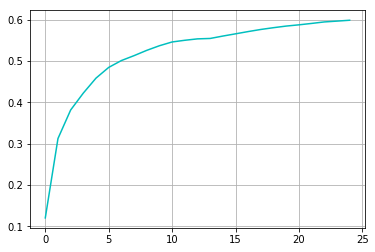

In [8]:
plt.figure(4)
x_range = np.arange(iter_num+1)
plt.plot(x_range,A,"c")
plt.grid(True)
plt.show()
